# HOME EQUITY LOAN

## DATA CLEANING

### Ramzy Mohammad

**Dataset:** Home Equity Loan Dataset | **Source:** http://www.creditriskanalytics.net/datasets-private2.html


The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. The data set has the following characteristics:<br>
<br>
<br>
◾ BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan <br>
◾ LOAN: Amount of the loan request <br>
◾ MORTDUE: Amount due on existing mortgage <br>
◾ VALUE: Value of current property <br>
◾ REASON: DebtCon = debt consolidation; HomeImp = home improvement <br>
◾ JOB: Occupational categories <br>
◾ YOJ: Years at present job <br>
◾ DEROG: Number of major derogatory reports <br>
◾ DELINQ: Number of delinquent credit lines <br>
◾ CLAGE: Age of oldest credit line in months <br>
◾ NINQ: Number of recent credit inquiries <br>
◾ CLNO: Number of credit lines <br>
◾ DEBTINC: Debt-to-income ratio

 **Home Equity Loan** - adalah pinjaman di mana peminjam menggunakan ekuitas rumah mereka sebagai jaminan. Pinjaman ini memungkinkan Anda untuk meminjam sejumlah besar uang tunai berdasarkan nilai rumah Anda, yang ditentukan oleh penilai, dan ekuitas Anda saat ini.

Pinjaman ekuitas tersedia sebagai pinjaman dengan suku bunga tetap atau yang dapat disesuaikan dan datang dengan jumlah waktu tertentu untuk melunasi hutang, biasanya antara 5 dan 30 tahun. Anda akan membayar biaya penutupan, tetapi itu akan jauh lebih sedikit daripada apa yang Anda bayar pada hipotek penuh khas. HEL dengan suku bunga tetap juga menawarkan prediksi suku bunga reguler sejak awal, yang disukai beberapa peminjam.



In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import mannwhitneyu

import pingouin as pg

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve

C:\Users\ASUS\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


# LOAD DATA

In [2]:
df = pd.read_csv('hmeq.csv')

In [3]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df.describe(exclude=['O'])

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [5]:
df.describe(include=['O'])

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


# Detecting Duplicate Data

In [6]:
df[df.duplicated(subset=None, keep=False) == True].head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


Tidak ada data duplikat

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


# CEK MISSING VALUE

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [9]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

Telihat dari info di atas, terdapat beberapa kolom yang memiliki missing value. 

Agar lebih jelas akan di tampilkan 'HeatMap' untuk missing value

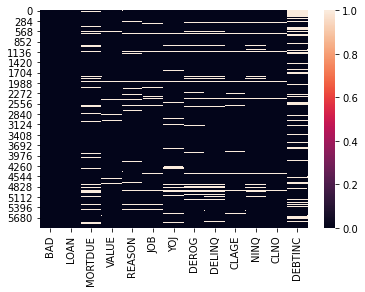

In [10]:
sns.heatmap(df.isna())
plt.show()

Sebelum diputuskan apakah missing value akan diremove atau tidak.

kita pastikan terlebih dahulu dengan mengecek ulang missing value dengan fungsi unique.

In [11]:
# telihat memang ada yang tidak missing nol, coba kita cek tiap kolum dengan value_counts atau unique nya
for column in df:
   
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")


BAD : [1 0]
0    4771
1    1189
Name: BAD, dtype: int64
_________________________________________________________________
LOAN : [ 1100  1300  1500  1700  1800  2000  2100  2200  2300  2400  2500  2800
  2900  3000  3100  3200  3300  3400  3500  3600  3700  3800  3900  4000
  4100  4200  4300  4400  4500  4700  4800  4900  5000  5100  5200  5300
  5400  5500  5600  5700  5800  5900  6000  6100  6200  6300  6400  6500
  6600  6700  6800  6900  7000  7100  7200  7300  7400  7500  7600  7700
  7800  7900  8000  8100  8200  8300  8400  8500  8600  8700  8800  8900
  9000  9100  9200  9300  9400  9500  9600  9700  9800  9900 10000 10100
 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300
 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500
 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700
 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900
 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [13]:
df.isna().sum()/len(df)*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

Berdasarkan info di atas, missing value masih di bawah 50%.
Sehingga keputusan yang diambil yaitu melakukan Imputing pada missing value.

# Strategy Imputing 

Sebelum menentukan strategi apa yang akan dilakukan terhadap missing value tiap-tiap kolom <br>

Terlebih dahulu akan di cek apakah kolom bertipe float yang memiliki missing value beridstribusi normal atau tidak. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [15]:
df_float = df.select_dtypes(include=[np.float])
df_float.columns

Index(['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
       'DEBTINC'],
      dtype='object')

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

<AxesSubplot:xlabel='DEBTINC', ylabel='Density'>

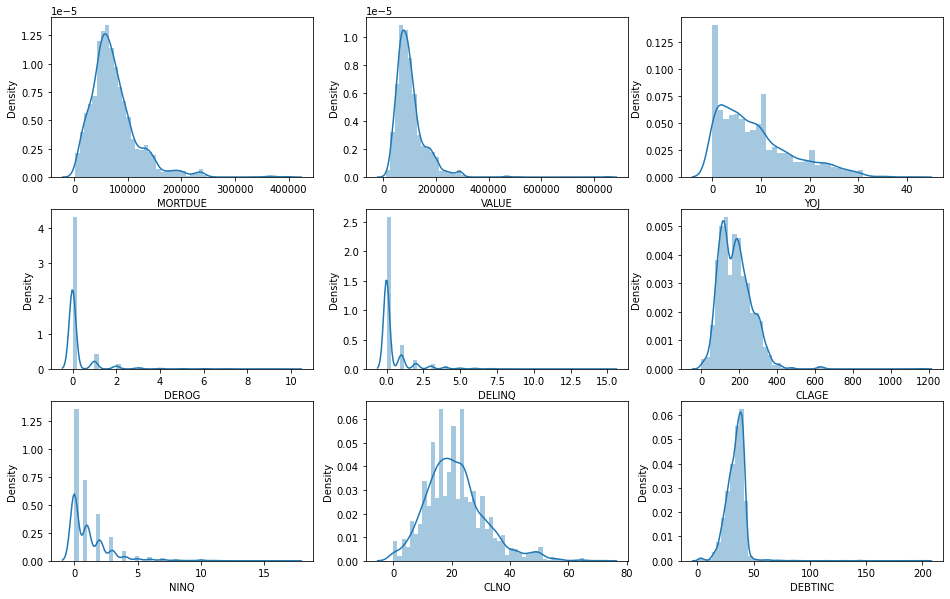

In [16]:
plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
sns.distplot(df.MORTDUE)

plt.subplot(3,3,2)
sns.distplot(df.VALUE)

plt.subplot(3,3,3)
sns.distplot(df.YOJ)

plt.subplot(3,3,4)
sns.distplot(df.DEROG)

plt.subplot(3,3,5)
sns.distplot(df.DELINQ)


plt.subplot(3,3,6)
sns.distplot(df.CLAGE)

plt.subplot(3,3,7)
sns.distplot(df.NINQ)

plt.subplot(3,3,8)
sns.distplot(df.CLNO)

plt.subplot(3,3,9)
sns.distplot(df.DEBTINC)

Secara visualisasi, telihat kolom MORTDUE dan CLNO mengikuti distribusi Normal.<br>

Untuk memastikan bahwa kolom MORTDUE dan CLNO berdistribusi normal, akan dilakukan Uji Normalitas.

In [17]:
# Uji Normalitas untuk kolom MORTDUE

test, pval = stats.shapiro(df['MORTDUE'])

if pval < 0.05:
    print('normal')
else:
    print('not normal')

not normal


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [18]:
# Uji Normalitas untuk kolom CLNO

test, pval = stats.shapiro(df['CLNO'])

if pval < 0.05:
    print('normal')
else:
    print('not normal')

not normal


Berdasarkan Uji Normalitas, ternyata kolom MORTDUE dan CLNO tidak berdistribusi Normal.

kesimpulannya, kolom-kolom yang bertipe float dan memiliki missing value akan diisi oleh median tiap-tiap kolom tersebut<br>
dan kolom-kolom yang bertipe objek dan memiliki missing value akan diisi oleh modus tiap-tiap kolom tersebut.

In [19]:
# imputing untuk kolom-kolom float yang memiliki missing value

In [20]:
imp_num = SimpleImputer(strategy = 'median')
df[['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']] = imp_num.fit_transform(df[['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']])
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,NaN,NaN,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [21]:
df.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     252
JOB        279
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
dtype: int64

In [22]:
# imputing untuk kolom-kolom object yang memiliki missing value

In [23]:
imp_mode = SimpleImputer(strategy='most_frequent')
df[['REASON', 'JOB']] = imp_mode.fit_transform(df[['REASON', 'JOB']])
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


Sehingga sudah tidak ada lagi kolom yang  memiliki missing value

In [24]:
df.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

Dibagian ini, kolom bertipe objek dianalisis, apakah terdapat value yang penulisannya masih typo. Sehingga dapat dilakukan perbaikan.

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


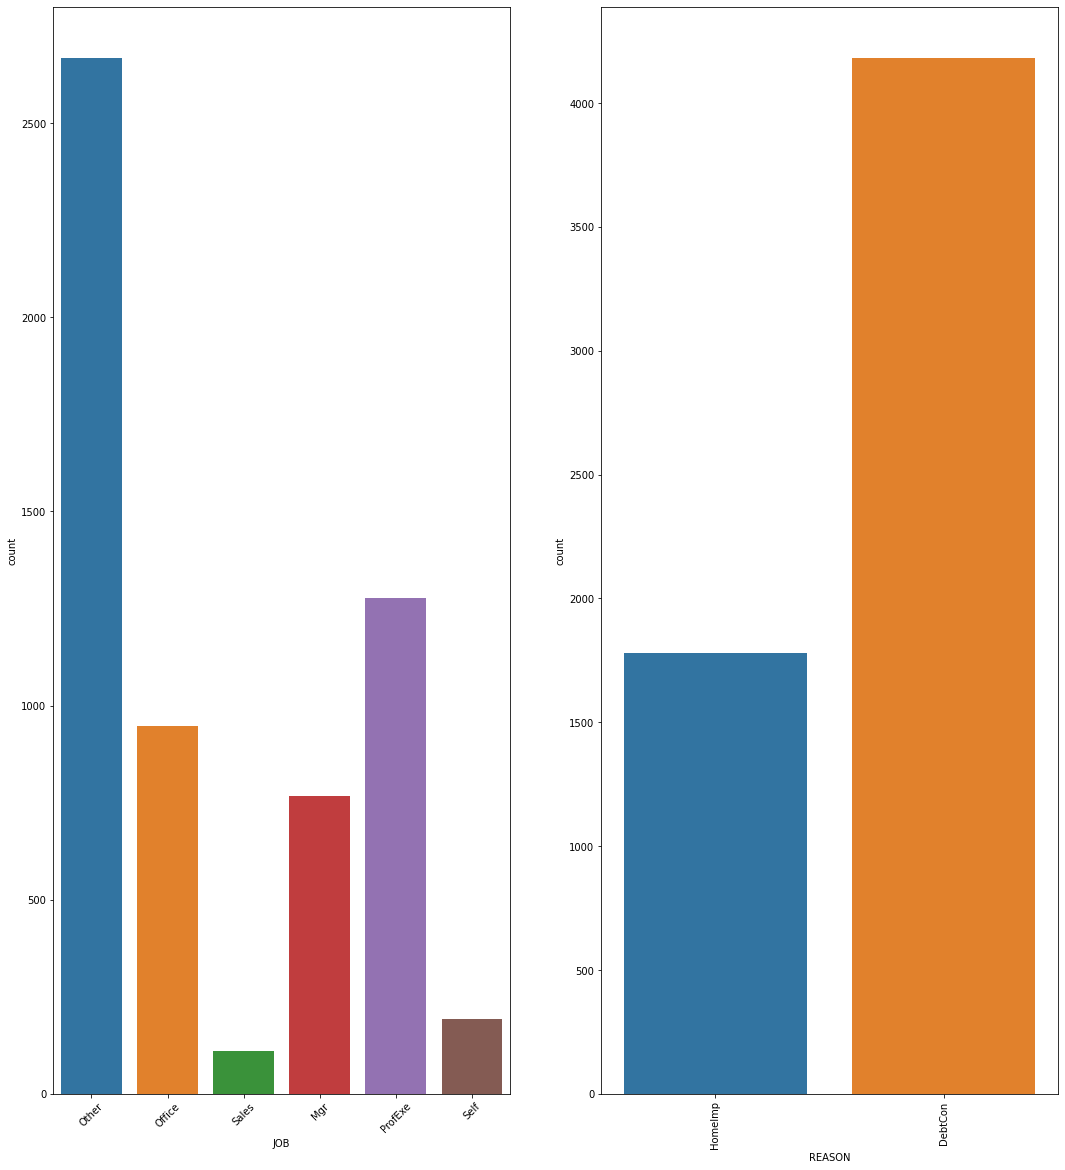

In [25]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,20))
# fig.delaxes(ax8)

sns.countplot(df['JOB'], ax = ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.subplots_adjust(hspace = 0.35)

sns.countplot(df['REASON'], ax = ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.subplots_adjust(hspace = 0.5)

plt.show()

Berdasarkan barplot di atas, tidak terdapat value yang memiliki kesalahan penulisan atau typo.

Kesimpulannya:<br>
1.Dataset yang telah dilakukan cleaning akan digunakan untuk proses Visualisasi, tetapi tidak akan digunakan untuk modeling<br>
2.Data Outlier akan di remove ketika proses modeling, untuk dilihat apakah ada pengaruh pada skor model ketika outlier di remove.

# SAVE DATASET CLEANING

In [26]:
df.to_csv('HMEQ_Clean.csv')